### Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
!gdown --id 1QqD_0VGvZy6rUnKubxD_Z_CKOy1DIeC6 --output final_train.csv
!gdown --id 11OcE-qPi-lbKKR5YsmcStuJznsKTkvpN --output final_test.csv

Downloading...
From: https://drive.google.com/uc?id=1QqD_0VGvZy6rUnKubxD_Z_CKOy1DIeC6
To: /content/final_train.csv
100% 698k/698k [00:00<00:00, 45.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=11OcE-qPi-lbKKR5YsmcStuJznsKTkvpN
To: /content/final_test.csv
100% 293k/293k [00:00<00:00, 39.9MB/s]


In [3]:
train_data = pd.read_csv('final_train.csv', sep=';')

In [4]:
train_data.head(5)

,id,gender,ssc_pct,ssc_board,hsc_pct,hsc_board,hsc_stream,degree_pct,degree_type,work_exp,emptest_pct,stream,mba_pct,status
0,10001,Female,69.31,Central Board,73.31,Central Board,Commerce,65.10,Commerce & Mgmt,No,70.92,Finance,56.70,0
1,10002,Male,67.12,Central Board,85.11,State Board,Commerce,73.63,Commerce & Mgmt,No,87.40,Finance,60.76,0
2,10003,Male,80.46,Central Board,57.43,Central Board,Science,65.38,Science & Tech,Yes,70.78,Finance,61.90,0
3,10004,Female,72.00,State Board,60.00,State Board,Science,69.00,Commerce & Mgmt,No,55.50,HR,58.40,0
4,10005,Female,60.13,Central Board,58.83,State Board,Commerce,54.43,Commerce & Mgmt,No,52.93,HR,58.15,0


In [5]:
def info_data(data):
    Null = pd.Series(data.isnull().sum())
    Unique_Count = pd.Series(data.describe(include='all',datetime_is_numeric=True).loc['unique', :])
    Data_type = pd.Series(data.dtypes)
    info_abt_data = pd.DataFrame(({"Null":Null, "Unique Count": Unique_Count, "Data type": Data_type}))
    return info_abt_data

In [6]:
info_data(train_data)

,Null,Unique Count,Data type
id,0,NaN,int64
gender,0,2,object
ssc_pct,110,NaN,float64
ssc_board,144,2,object
hsc_pct,244,NaN,float64
hsc_board,121,2,object
hsc_stream,0,3,object
degree_pct,172,NaN,float64
degree_type,37,3,object
work_exp,313,2,object


In [7]:
train_data.gender.value_counts(normalize=True) 

Male      0.646571
Female    0.353429
Name: gender, dtype: float64

In [8]:
def plot_missing_data(data):
    columns_with_null = data.columns[data.isna().sum() > 0]
    null_pct = (data[columns_with_null].isna().sum() / data.shape[0]).sort_values(ascending=False) * 100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Na values in dataframe by columns');

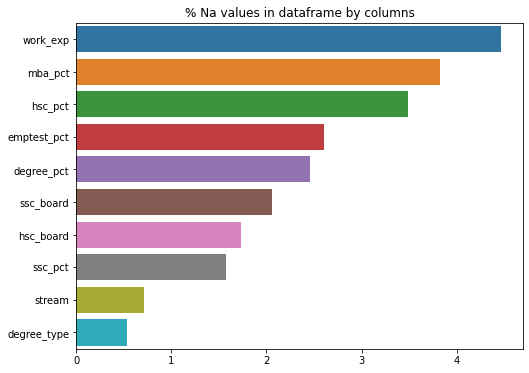

In [9]:
plot_missing_data(train_data)

In [10]:
train_data.corr()

,id,ssc_pct,hsc_pct,degree_pct,emptest_pct,mba_pct,status
id,1.000000,0.005241,-0.022312,-0.016543,-0.002405,-0.002344,0.003832
ssc_pct,0.005241,1.000000,0.019524,0.019009,0.007299,0.007243,0.025821
hsc_pct,-0.022312,0.019524,1.000000,0.010015,0.006360,0.008097,0.048022
degree_pct,-0.016543,0.019009,0.010015,1.000000,0.007659,0.007405,0.029932
emptest_pct,-0.002405,0.007299,0.006360,0.007659,1.000000,0.009007,0.045015
mba_pct,-0.002344,0.007243,0.008097,0.007405,0.009007,1.000000,0.007846
status,0.003832,0.025821,0.048022,0.029932,0.045015,0.007846,1.000000


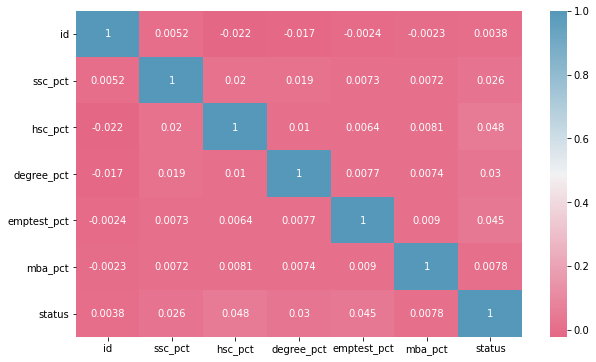

In [11]:
#get correlations of each features in train dataset
corrmat = train_data.corr()
plt.figure(figsize=(10,6))
cmap = sns.diverging_palette(0, 230, 70, 60, as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap=cmap)

In [12]:
train_data.head(3)

,id,gender,ssc_pct,ssc_board,hsc_pct,hsc_board,hsc_stream,degree_pct,degree_type,work_exp,emptest_pct,stream,mba_pct,status
0,10001,Female,69.31,Central Board,73.31,Central Board,Commerce,65.10,Commerce & Mgmt,No,70.92,Finance,56.70,0
1,10002,Male,67.12,Central Board,85.11,State Board,Commerce,73.63,Commerce & Mgmt,No,87.40,Finance,60.76,0
2,10003,Male,80.46,Central Board,57.43,Central Board,Science,65.38,Science & Tech,Yes,70.78,Finance,61.90,0


In [13]:
train_data.stream.value_counts(normalize=True) 

Finance    0.561583
HR         0.438417
Name: stream, dtype: float64

In [14]:
train_data['gender_map'] = train_data.gender.map({'Female':0, 'Male':1})
train_data['ssc_board_map'] = train_data.ssc_board.map({'State Board':0, 'Central Board':1})
train_data['hsc_board_map'] = train_data.hsc_board.map({'State Board':1, 'Central Board':0})
train_data['hsc_stream_map'] = train_data.hsc_stream.map({'Commerce':2, 'Science':1 , 'Arts':0})
train_data['degree_type_map'] = train_data.degree_type.map({'Commerce & Mgmt':2, 'Science & Tech':1 , 'Other Degree': 0})
train_data['work_exp_map'] = train_data.work_exp.map({'No':1, 'Yes':0})
train_data['stream_map'] = train_data.stream.map({'Finance':1, 'HR':0})

In [15]:
train_data[['ssc_board', 'ssc_board_map']] 

,ssc_board,ssc_board_map
0,Central Board,1.0
1,Central Board,1.0
2,Central Board,1.0
3,State Board,0.0
4,Central Board,1.0
...,...,...
6995,State Board,0.0
6996,Central Board,1.0
6997,State Board,0.0
6998,State Board,0.0


In [16]:
train_data.head(3)

,id,gender,ssc_pct,ssc_board,hsc_pct,hsc_board,hsc_stream,degree_pct,degree_type,work_exp,emptest_pct,stream,mba_pct,status,gender_map,ssc_board_map,hsc_board_map,hsc_stream_map,degree_type_map,work_exp_map,stream_map
0,10001,Female,69.31,Central Board,73.31,Central Board,Commerce,65.10,Commerce & Mgmt,No,70.92,Finance,56.70,0,0,1.0,0.0,2,2.0,1.0,1.0
1,10002,Male,67.12,Central Board,85.11,State Board,Commerce,73.63,Commerce & Mgmt,No,87.40,Finance,60.76,0,1,1.0,1.0,2,2.0,1.0,1.0
2,10003,Male,80.46,Central Board,57.43,Central Board,Science,65.38,Science & Tech,Yes,70.78,Finance,61.90,0,1,1.0,0.0,1,1.0,0.0,1.0


In [ ]:
info_data(train_data)

,Null,Unique Count,Data type
id,0,NaN,int64
gender,0,2,object
ssc_pct,110,NaN,float64
ssc_board,144,2,object
hsc_pct,244,NaN,float64
hsc_board,121,2,object
hsc_stream,0,3,object
degree_pct,172,NaN,float64
degree_type,37,3,object
work_exp,313,2,object


In [ ]:
# train_data = train_data.drop(['gender','ssc_board', 'hsc_board', 'hsc_stream', 'degree_type', 'work_exp', 'stream'], axis = 1)
train_data = train_data[['gender_map', 'ssc_pct','ssc_board_map', 'hsc_pct', 'hsc_board_map', 'hsc_stream_map', 'degree_pct', 'degree_type_map', 'work_exp_map', 'emptest_pct','stream_map','mba_pct','status']]

In [ ]:
train_data.head(3)

,gender_map,ssc_pct,ssc_board_map,hsc_pct,hsc_board_map,hsc_stream_map,degree_pct,degree_type_map,work_exp_map,emptest_pct,stream_map,mba_pct,status
0,0,69.31,1.0,73.31,0.0,2,65.10,2.0,1.0,70.92,1.0,56.70,0
1,1,67.12,1.0,85.11,1.0,2,73.63,2.0,1.0,87.40,1.0,60.76,0
2,1,80.46,1.0,57.43,0.0,1,65.38,1.0,0.0,70.78,1.0,61.90,0


In [ ]:
# train_data.work_exp_map.unique()

In [ ]:
# train_data = train_data.drop(['id'], axis = 1)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(train_data), columns = train_data.columns)
# df.head()

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(train_data),columns = train_data.columns)

In [ ]:
df.head(5)

,gender_map,ssc_pct,ssc_board_map,hsc_pct,hsc_board_map,hsc_stream_map,degree_pct,degree_type_map,work_exp_map,emptest_pct,stream_map,mba_pct,status
0,0.0,69.31,1.0,73.31,0.0,2.0,65.10,2.0,1.0,70.92,1.0,56.70,0.0
1,1.0,67.12,1.0,85.11,1.0,2.0,73.63,2.0,1.0,87.40,1.0,60.76,0.0
2,1.0,80.46,1.0,57.43,0.0,1.0,65.38,1.0,0.0,70.78,1.0,61.90,0.0
3,0.0,72.00,0.0,60.00,1.0,1.0,69.00,2.0,1.0,55.50,0.0,58.40,0.0
4,0.0,60.13,1.0,58.83,1.0,2.0,54.43,2.0,1.0,52.93,0.0,58.15,0.0


In [ ]:
df.isnull().sum()

gender_map         0
ssc_pct            0
ssc_board_map      0
hsc_pct            0
hsc_board_map      0
hsc_stream_map     0
degree_pct         0
degree_type_map    0
work_exp_map       0
emptest_pct        0
stream_map         0
mba_pct            0
status             0
dtype: int64

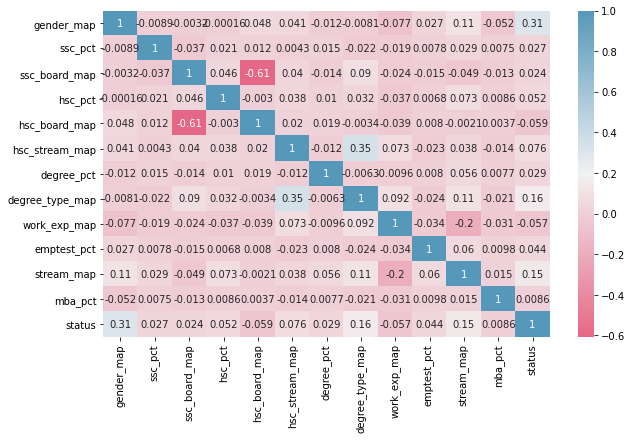

In [ ]:
#get correlations of each features in dataset
corrmat = df.corr()
plt.figure(figsize=(10,6))
cmap = sns.diverging_palette(0, 230, 70, 60, as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap=cmap)

In [ ]:
df.corr()

,gender_map,ssc_pct,ssc_board_map,hsc_pct,hsc_board_map,hsc_stream_map,degree_pct,degree_type_map,work_exp_map,emptest_pct,stream_map,mba_pct,status
gender_map,1.000000,-0.008892,-0.003193,-0.000157,0.047887,0.041060,-0.012134,-0.008062,-0.077142,0.027059,0.108560,-0.051653,0.305968
ssc_pct,-0.008892,1.000000,-0.036585,0.020854,0.011891,0.004321,0.014989,-0.021682,-0.019492,0.007758,0.029018,0.007538,0.027162
ssc_board_map,-0.003193,-0.036585,1.000000,0.046323,-0.606115,0.039722,-0.014131,0.090186,-0.024056,-0.014860,-0.049391,-0.012555,0.023708
hsc_pct,-0.000157,0.020854,0.046323,1.000000,-0.003037,0.038373,0.010088,0.032393,-0.036974,0.006810,0.072637,0.008621,0.051790
hsc_board_map,0.047887,0.011891,-0.606115,-0.003037,1.000000,0.020094,0.019106,-0.003381,-0.039430,0.007985,-0.002111,0.003682,-0.059065
hsc_stream_map,0.041060,0.004321,0.039722,0.038373,0.020094,1.000000,-0.011538,0.346040,0.073122,-0.023104,0.037601,-0.014462,0.075601
degree_pct,-0.012134,0.014989,-0.014131,0.010088,0.019106,-0.011538,1.000000,-0.006328,-0.009625,0.008031,0.056374,0.007678,0.029438
degree_type_map,-0.008062,-0.021682,0.090186,0.032393,-0.003381,0.346040,-0.006328,1.000000,0.092339,-0.023538,0.108848,-0.020879,0.156776
work_exp_map,-0.077142,-0.019492,-0.024056,-0.036974,-0.039430,0.073122,-0.009625,0.092339,1.000000,-0.033848,-0.197852,-0.031365,-0.057269
emptest_pct,0.027059,0.007758,-0.014860,0.006810,0.007985,-0.023104,0.008031,-0.023538,-0.033848,1.000000,0.060106,0.009778,0.044270


In [ ]:
df.work_exp_map.unique()

array([1. , 0. , 0.6, 0.2, 0.8, 0.4])

In [ ]:
train_data.work_exp_map.unique()

array([ 1.,  0., nan])

In [ ]:
train_data.work_exp_map.value_counts(normalize=True) 

1.0    0.649918
0.0    0.350082
Name: work_exp_map, dtype: float64

In [ ]:
# df.to_csv('cleantrain.csv')

In [ ]:
df.head(10)

,gender_map,ssc_pct,ssc_board_map,hsc_pct,hsc_board_map,hsc_stream_map,degree_pct,degree_type_map,work_exp_map,emptest_pct,stream_map,mba_pct,status
0,0.0,69.31,1.0,73.310,0.0,2.0,65.10,2.0,1.0,70.92,1.0,56.70,0.0
1,1.0,67.12,1.0,85.110,1.0,2.0,73.63,2.0,1.0,87.40,1.0,60.76,0.0
2,1.0,80.46,1.0,57.430,0.0,1.0,65.38,1.0,0.0,70.78,1.0,61.90,0.0
3,0.0,72.00,0.0,60.000,1.0,1.0,69.00,2.0,1.0,55.50,0.0,58.40,0.0
4,0.0,60.13,1.0,58.830,1.0,2.0,54.43,2.0,1.0,52.93,0.0,58.15,0.0
5,1.0,50.38,0.0,56.470,1.0,1.0,61.00,1.0,1.0,60.00,0.0,61.60,0.0
6,1.0,80.71,0.0,82.270,1.0,2.0,77.50,2.0,1.0,91.06,1.0,74.63,1.0
7,1.0,68.96,1.0,68.108,0.0,1.0,63.71,0.0,0.0,65.96,0.0,727.60,0.0
8,1.0,43.57,0.0,54.860,1.0,1.0,61.28,1.0,0.0,87.24,1.0,59.11,0.0
9,1.0,61.88,0.0,62.530,1.0,2.0,63.77,2.0,1.0,66.88,1.0,56.95,0.0


In [ ]:
inputs = df[['gender_map', 'ssc_pct','ssc_board_map', 'hsc_pct', 'hsc_board_map', 'hsc_stream_map', 'degree_pct', 'degree_type_map', 'work_exp_map', 'emptest_pct','stream_map','mba_pct']]
targets = df['status']

In [ ]:
inputs.shape , targets.shape

((7000, 12), (7000,))

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(inputs, targets, test_size = 0.2, random_state = 365)

In [ ]:
# from sklearn.linear_model import LogisticRegression


# # model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
# # model.fit(x_train,y_train)

# model = LogisticRegression(solver='newton-cg')
# model.fit(x_train,y_train)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(p=2, metric='minkowski', n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
y_pred

array([0., 1., 1., ..., 0., 1., 1.])

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[995,  18],
       [113, 274]])

Text(0.5, 257.44, 'Predicted label')

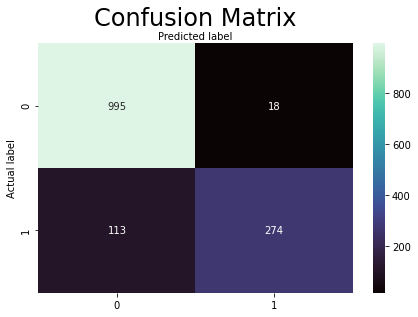

In [ ]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="mako" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1, size = 24)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy = "+ str(((model.score(x_test,y_test))*100).round(3))+"%")


Accuracy = 90.643%


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report



rfc_cv_score = cross_val_score(model, x_test, y_test, cv=10, scoring='roc_auc')


print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
# print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())
print("Mean AUC Score - Gradient Boost: ", rfc_cv_score.mean())


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      1013
         1.0       0.94      0.71      0.81       387

    accuracy                           0.91      1400
   macro avg       0.92      0.85      0.87      1400
weighted avg       0.91      0.91      0.90      1400



=== All AUC Scores ===
[0.9121517  0.83823529 0.79166667 0.82736735 0.82432089 0.83663366
 0.82990607 0.79855293 0.86176695 0.87407972]


=== Mean AUC Score ===
Mean AUC Score - Gradient Boost:  0.8394681234020043


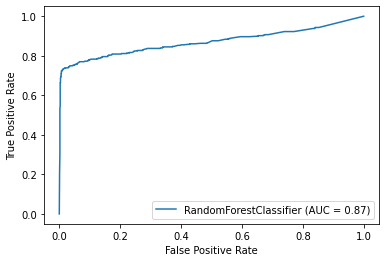

In [ ]:

from sklearn.metrics import plot_roc_curve
rfc_ROC_disp = plot_roc_curve(model, x_test, y_test)
plt.show()

In [ ]:
df.drop(df[df[['ssc_pct','hsc_pct','degree_pct', 'emptest_pct',  'mba_pct']] >= 100].index, inplace = True) 

### XGB Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# define the model
model_xgbc = XGBClassifier(learning_rate = 0.001, n_estimators=150, max_depth=5)

# fit the model on train data
model_xgbc.fit(x_train, y_train)

# predict on test set
yhat_xgbc = model_xgbc.predict(x_test)

In [ ]:
print("Accuracy = "+ str(((model_xgbc.score(x_test,y_test))*100).round(3))+"%")


Accuracy = 89.5%


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

rfc_cv_score = cross_val_score(model_xgbc, x_test, y_test, cv=10, scoring='roc_auc')


print("=== Classification Report ===")
print(classification_report(y_test, yhat_xgbc))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - XGB: ", rfc_cv_score.mean())

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      1013
         1.0       0.91      0.69      0.78       387

    accuracy                           0.90      1400
   macro avg       0.90      0.83      0.86      1400
weighted avg       0.90      0.90      0.89      1400



=== All AUC Scores ===
[0.8623581  0.88222394 0.81630547 0.88245748 0.8889312  0.8871541
 0.87192181 0.73813151 0.90657527 0.8612592 ]


=== Mean AUC Score ===
Mean AUC Score - XGB:  0.8597318079033434
